# Explore observation data

* In-situ (buoy/station) data
    - Significant wave height
    - Peak wave period
    - Mean wave direction
* Satellite altimetry data
    - Significant wave height

Note: The MIKE IO and ModelSkill packages are used here for convenient plotting functionality. They are not required for working with the observation data. 

### Load packages

In [63]:
import pandas as pd
import mikeio
import modelskill as ms
import helper as h
import matplotlib.pyplot as plt

### Define folder and mesh

In [64]:
obs_fldr = "../observations/" 
msh = mikeio.open("../input/Mesh_8000_elems.mesh")
save_fig = True
show_fig = True

## In-situ stations

In [65]:
df_stn = pd.read_csv(obs_fldr + "stations_subset.csv", index_col=0)
df_stn

,lat,lon
station,,
6201045,54.29402,-0.31852
6201047,55.18517,-1.47835
6201050,53.24490,0.44699
6201059,52.47586,1.81717
A121,55.41664,3.81663
Europlatform2,51.99861,3.27639
F3platform,54.85389,4.72750
IJmuidenMunitiestort,52.55000,4.05833
J61,53.81663,2.95000


## Significant wave height stations

In [66]:
swhlist = h.get_swh_point_obs(obs_fldr = "../observations/", meas_fldr = "../observations/measurements/", station_file="stations_subset.csv")

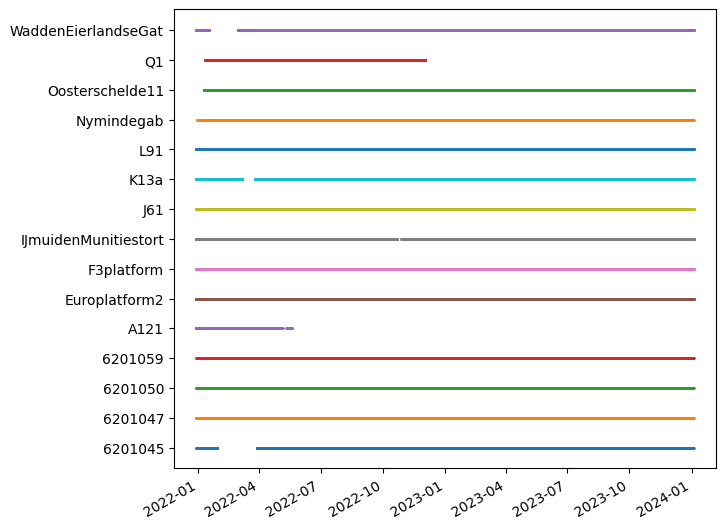

In [67]:
ms.plotting.temporal_coverage(swhlist);

### Spatial overview

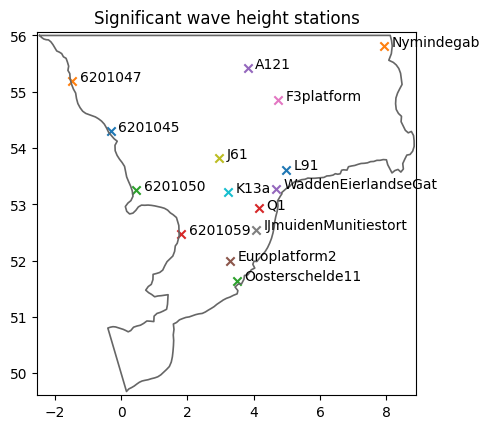

In [68]:
ms.plotting.spatial_overview(swhlist, mod=msh.geometry,figsize=(5,5));
plt.tight_layout()
plt.title("Significant wave height stations")
if save_fig:
    plt.savefig("../figures/swh_stations.png")
if show_fig:
    plt.show()
else:
    plt.close()

## Peak wave period stations

In [69]:
tplist = h.get_tp_point_obs(obs_fldr = "../observations/", meas_fldr = "../observations/measurements/", station_file="stations_subset.csv")

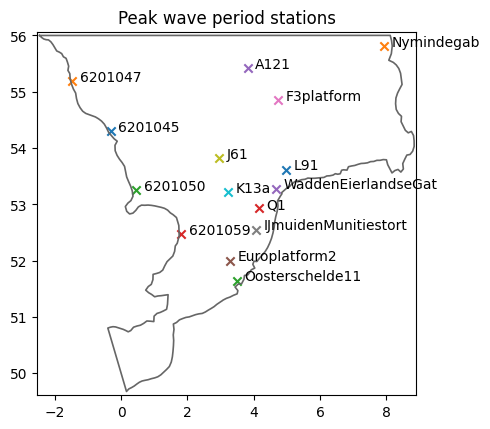

In [70]:
ms.plotting.spatial_overview(tplist, mod=msh.geometry,figsize=(5,5));
plt.tight_layout()
plt.title("Peak wave period stations")
if save_fig:
    plt.savefig("../figures/tp_stations.png")
if show_fig:
    plt.show()
else:
    plt.close()

## Mean wave direction stations

In [71]:
mwdlist = h.get_mwd_point_obs(obs_fldr = "../observations/", meas_fldr = "../observations/measurements/", station_file="stations.csv") # Include all stations, as fewer stations have the direction feature

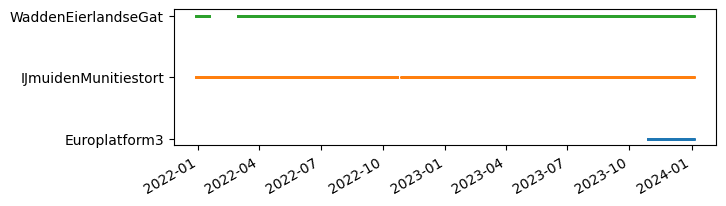

In [72]:
ms.plotting.temporal_coverage(mwdlist);

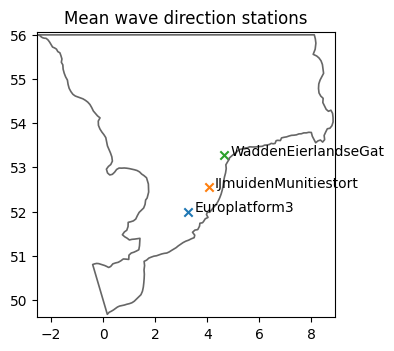

In [73]:
ms.plotting.spatial_overview(mwdlist, mod=msh.geometry,figsize=(4,4));
plt.tight_layout()
plt.title("Mean wave direction stations")
if save_fig:
    plt.savefig("../figures/mwd_stations.png")
if show_fig:
    plt.show()
else:
    plt.close()

## Altimetry

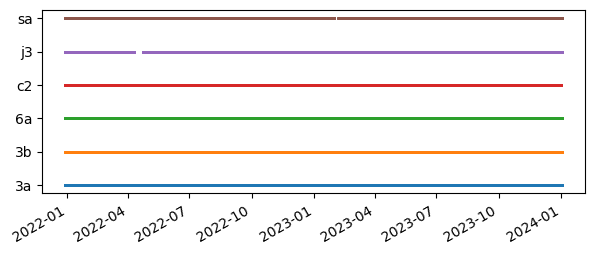

In [74]:
altlist = h.get_altimetry_obs(quality=None)
ms.plotting.temporal_coverage(altlist);

In [75]:
altlist_jan22 = [al.sel(time=slice("2022-01-01","2022-03-31")) for al in altlist]

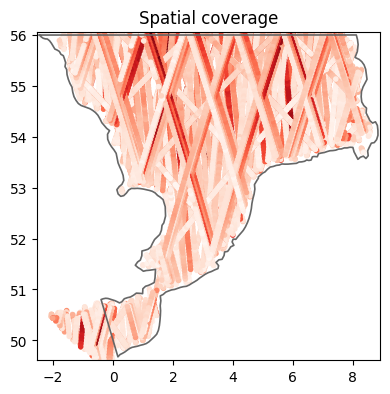

In [76]:
ms.plotting.spatial_overview(altlist_jan22, mod=msh.geometry,figsize=(4,4));
plt.tight_layout()
if save_fig:
    plt.savefig("../figures/altimetry_coverage.png")
if show_fig:
    plt.show()
else:
    plt.close()

### Combined plot (for readme)

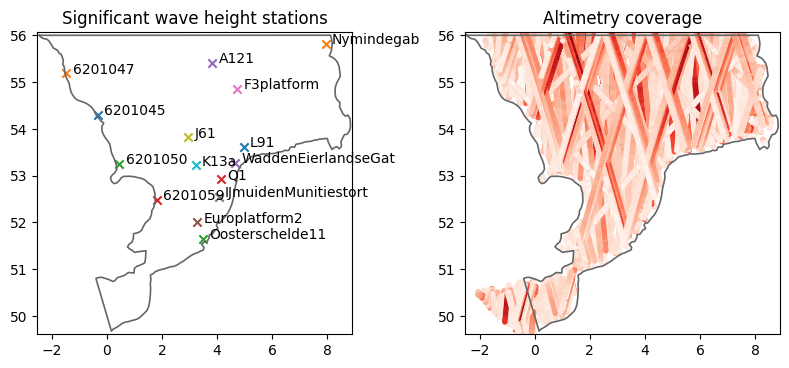

In [77]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))  # one row, two columns

# Left subplot: Significant wave height stations
ms.plotting.spatial_overview(swhlist, mod=msh.geometry, ax=axes[0])
axes[0].set_title("Significant wave height stations")

# Right subplot: Altimetry coverage
ms.plotting.spatial_overview(altlist_jan22, mod=msh.geometry, ax=axes[1])
axes[1].set_title("Altimetry coverage")

plt.tight_layout()

if save_fig:
    plt.savefig("../figures/swh_and_altimetry.png", dpi=300, bbox_inches="tight")

if show_fig:
    plt.show()
else:
    plt.close()
